# Grid World Visualization--Part I
Consider a grid world modeled using a 2D numpy array of dimension of $10\times 10$. There are 10 robots moving in the field. Write a function, named `display_grid` that takes the current locations of all robots as inputs, and displays the locations of all robots. Use appropriate plot to display the locations, and clearly label your plot. Read the documentation of `xlim` and `ylim`, and use them to make sure that the whole grid can be displayed in your plot.

An example of robot locations, i.e., input to the function, is given below:

```py
 location = np.array([[9 8],
                    [8 7],
                    [9 3],
                    [4 3],
                    [3 1],
                    [3 2],
                    [2 7],
                    [4 4],
                    [0 0],
                    [5 4]])
```
Each row of the input array corresponds to an agent. The first column represents the row indices of all agents, and the second column represents the column indices of all agents in the field. An exmaple output is given below:
![Example output](assets/robot_location.png)

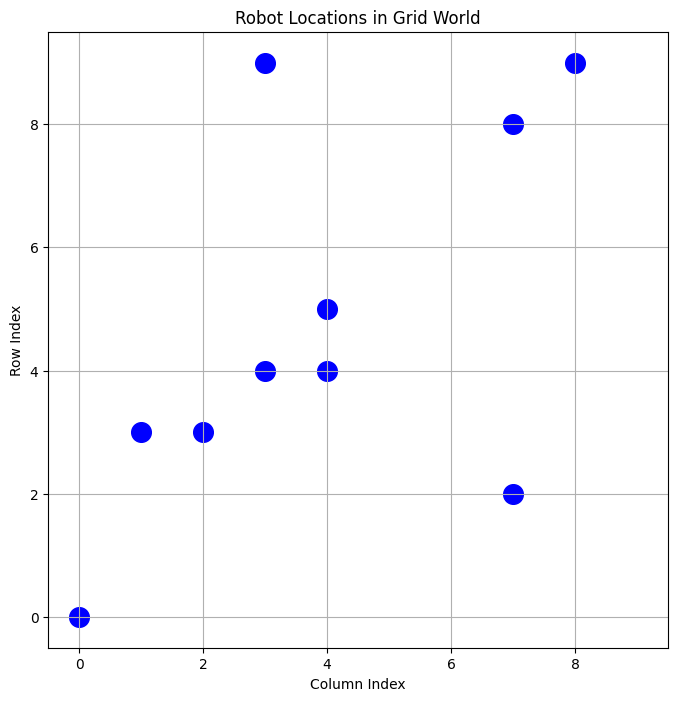

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def display_grid(location):
    # The location array has rows and columns
    # First column is rows, second column is columns
    
    # Extract row and column positions
    rows = location[:, 0]
    cols = location[:, 1]
    
    # Create the plot
    plt.figure(figsize=(8, 8))
    
    # Plot the robot positions (Scatter plot)
    plt.scatter(cols, rows, s=200, c='blue', marker='o')
    
    # Add labels
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.title('Robot Locations in Grid World')
    
    # Set the limits to show the whole 10x10 grid
    plt.xlim(-0.5, 9.5)
    plt.ylim(-0.5, 9.5)
    
    # Add grid lines for better viewing
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Test with the example data
location = np.array([[9, 8],
                     [8, 7],
                     [9, 3],
                     [4, 3],
                     [3, 1],
                     [3, 2],
                     [2, 7],
                     [4, 4],
                     [0, 0],
                     [5, 4]])

display_grid(location)

# Grid World Visualization--Part II
Each robot can take one out of four actions: ["up", "down", "left", "right"], indicating the direction towards which the robot will move. If the moving direction will make the robot go outside the boundary of the grid world, then the robot will remain at its current location.

Write a function named `update_location` that takes the current location and action of a robot as inputs, and return its updated location. Feel free to verify your code by plotting the locations of robot before and after taking actions.

Original location: [5 5]
After moving right: [5 6]
After moving up: [4 5]

Robot at corner [0, 0]:
After moving up (should stay): [0 0]
After moving left (should stay): [0 0]

--- Visualization Test ---
Before moving:


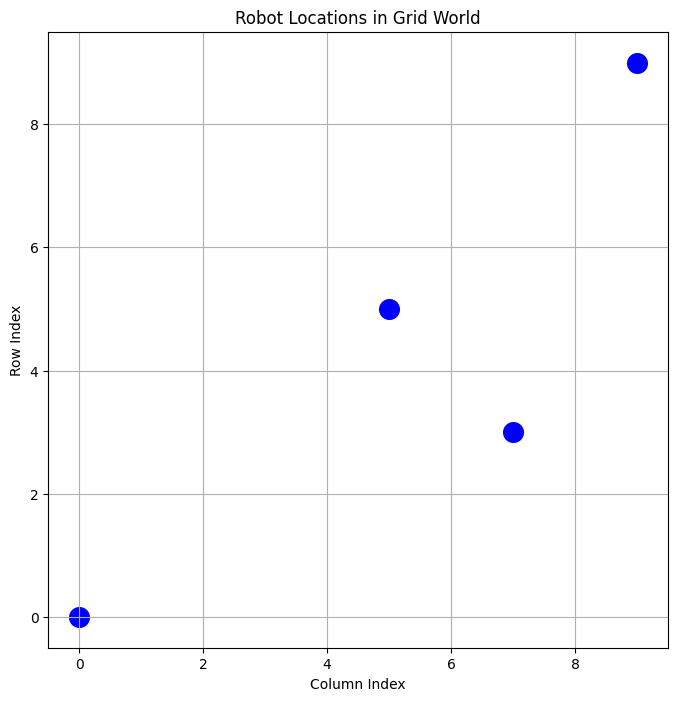

After all moving right:


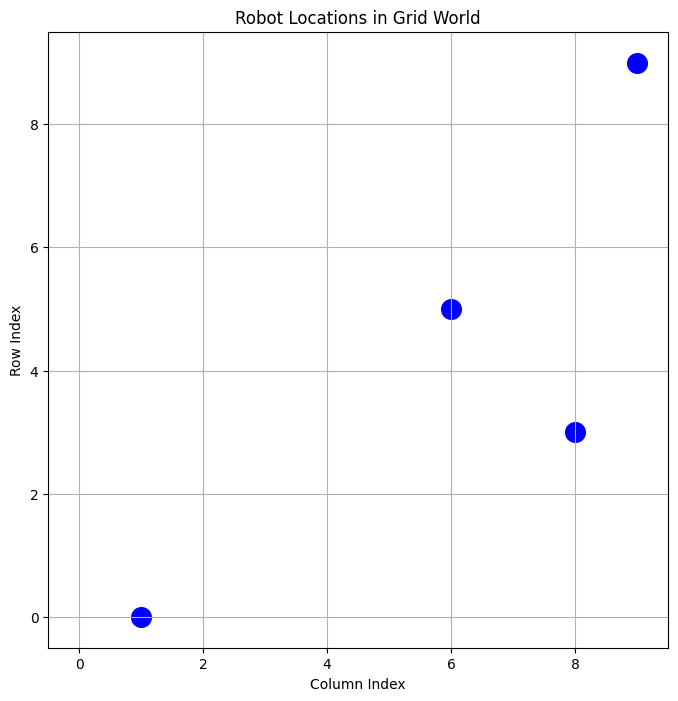

In [ ]:
def update_location(current_location, action):
    # Make a copy so original is not modified
    new_location = current_location.copy()
    
    # Get current row and column
    row = new_location[0]
    col = new_location[1]
    
    # Update based on action
    if action == "up":
        row = row - 1
    elif action == "down":
        row = row + 1
    elif action == "left":
        col = col - 1
    elif action == "right":
        col = col + 1
    
    # Check boundaries to make sure to stay in range
    if row < 0:
        row = current_location[0]  # Stay at original position
    elif row > 9:
        row = current_location[0]
    
    if col < 0:
        col = current_location[1]  # Stay at original position
    elif col > 9:
        col = current_location[1]
    
    # Update the location
    new_location[0] = row
    new_location[1] = col
    
    return new_location

# Test 1
test_location = np.array([5, 5])
print("Original location:", test_location)

# Test 2 moving right
new_loc = update_location(test_location, "right")
print("After moving right:", new_loc)

# Test 3 moving up
new_loc = update_location(test_location, "up")
print("After moving up:", new_loc)

# Test 4 boundary
edge_location = np.array([0, 0])
print("\nRobot at corner [0, 0]:")
new_loc = update_location(edge_location, "up")
print("After moving up (should stay):", new_loc)

new_loc = update_location(edge_location, "left")
print("After moving left (should stay):", new_loc)

# Visualize before and after to check visually if it's correct
print("\n--- Visualization Test ---")
initial_loc = np.array([[5, 5],
                        [0, 0],
                        [9, 9],
                        [3, 7]])

print("Before moving:")
display_grid(initial_loc)

# Move all robots right
updated_locs = []
for i in range(len(initial_loc)):
    new_pos = update_location(initial_loc[i], "right")
    updated_locs.append(new_pos)

updated_locs = np.array(updated_locs)
print("After all moving right:")
display_grid(updated_locs)

# Infectious Disease Visualization
Revise your function "simulate_disease" from previous assignment to achieve the following goals. The function should print out the statistic information of the infection probability at the end of prediction horizon, including minimum, maximum, average, and standard deviation.

The function should also plot how the infection probabilities of all individuals evolve over the prediction horizon. Pick appropriate visualization plot and clearly label your plot. You do not need to generate legends for the plot. 


Initial Infection Probabilities:
[0.49238104 0.63125307 0.83949792 0.4610394  0.49794007]

Statistics at end of prediction horizon:
  Minimum: 0.6034
  Maximum: 0.6034
  Average: 0.6034
  Standard Deviation: 0.0000



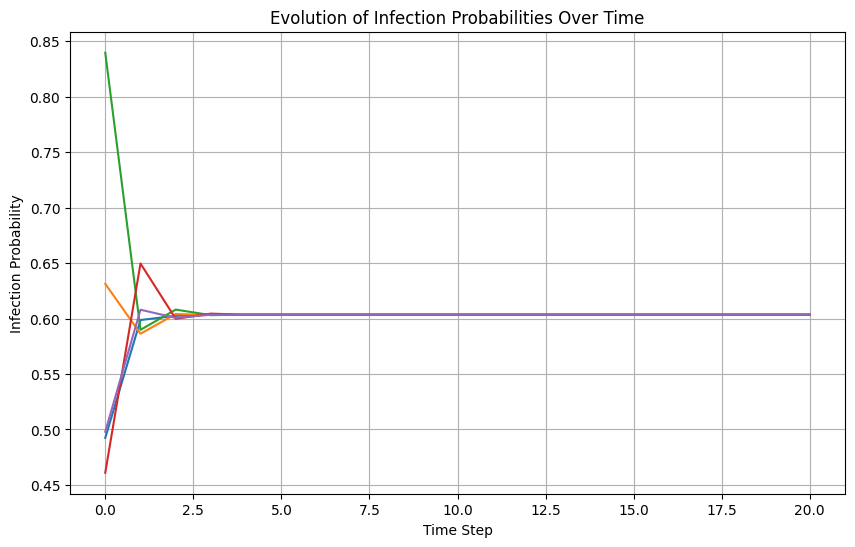

Final probabilities: [0.60340112 0.60340112 0.60340112 0.60340112 0.60340112]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_disease(initial_prob, connection_matrix, time_horizon):
    """
    Simulate infectious disease propagation over a network.
    
    The simulation uses the iterative formula: P(t+1) = A x P(t)
    where A is the connection matrix and P(t) is the infection probability
    vector at time t.
    
    Parameters:
    initial_prob : numpy.ndarray
        
    connection_matrix : numpy.ndarray
        
    time_horizon : int
        
    Returns:
    numpy.ndarray : 1D numpy array of shape (N,) containing infection probabilities for each individual after the specified time horizon.
    """
    # Get number of individuals
    N = len(initial_prob)
    
    # Store probabilities at each time step
    prob_history = np.zeros((time_horizon + 1, N))
    
    # Store initial probabilities
    prob_history[0] = initial_prob.copy()
    current_prob = initial_prob.copy()
    
    # Simulate disease propagation for the specified time horizon
    for t in range(time_horizon):
        current_prob = np.dot(connection_matrix, current_prob)
        prob_history[t + 1] = current_prob
    
    # Print statistics for final probabilities
    final_prob = prob_history[-1]
    print("Statistics at end of prediction horizon:")
    print(f"  Minimum: {np.min(final_prob):.4f}")
    print(f"  Maximum: {np.max(final_prob):.4f}")
    print(f"  Average: {np.mean(final_prob):.4f}")
    print(f"  Standard Deviation: {np.std(final_prob):.4f}")
    print()
    
    # Plot the evolution of infection probabilities
    plt.figure(figsize=(10, 6))
    
    # Plot each individual's probability over time
    time_steps = np.arange(time_horizon + 1)
    for i in range(N):
        plt.plot(time_steps, prob_history[:, i])
    
    # Label the plot
    plt.xlabel('Time Step')
    plt.ylabel('Infection Probability')
    plt.title('Evolution of Infection Probabilities Over Time')
    plt.grid(True)
    plt.show()
    
    return final_prob


# Test with the same setup from Assignment 5
np.random.seed(20)

N = 5

matrix = np.random.rand(N, N)
symmetric_matrix = (matrix + matrix.T) / 2
connection_matrix = symmetric_matrix / symmetric_matrix.sum(axis=1, keepdims=True)

initial_infection_prob = np.random.rand(N)

print("Initial Infection Probabilities:")
print(initial_infection_prob)
print()

# Run simulation
final_prob = simulate_disease(initial_infection_prob, connection_matrix, 20)
print("Final probabilities:", final_prob)

# Image Downsampling
Write a function named `downsample_image`. The function takes a grayscale image and an integer downsampling rate as input and outputs a filtered version of the image. The input image is represented by a 2D numpy array. You can assume the image is of a square shape, and the image size is larger than downsampling rate. To downsample the image, we follow the steps below:
- Partition the image into a collection of smaller blocks. Each block is of dimension $k\times k$, where $k$ is the downsampling rate. If the original image is of dimension $N\times N$, then the rows and columns are partitions into $\frac{N}{k}$ segments, respectively. The output image should then be of dimension $\frac{N}{k}\times \frac{N}{k}$.
- For each block associated with $i$-th row segment, and $j$-th column segment, calculate the average of all pixels within the block, and the average is $(i,j)$-th pixel in output image is assigned as the average. 


Your function should display the downsampled image. An example of the downsampling process is given below:
![downsample process](assets/filter.gif)

The red block in this example is sometimes referred to as a kernel. The kernel in this example is known as a moving average filter. 

Please use this image to test your function. Although this is a colorful image, you can convert it to grayscale using the code below and then pass it to the function:

```py
from PIL import Image
img = Image.open('sample_image_2.jpg').convert('L') # load image in gray scale
img_array = np.array(img) # 8-bit code grayscale
```
See an example of downsampled image with downsampling rate=5:

![downsampled image](assets/dsimg.png)


Revise your function to downsample a colorful image. Note that a colorful image can be represented as a 3D numpy array, where the 3rd dimension represents the RGB channels.

**Extra challenge** (this challenge is not graded): This challenge will test your code efficiency. You need to improve your code to achieve runtime . Please use the following code to test your efficiency:


Original image shape: (258, 196)


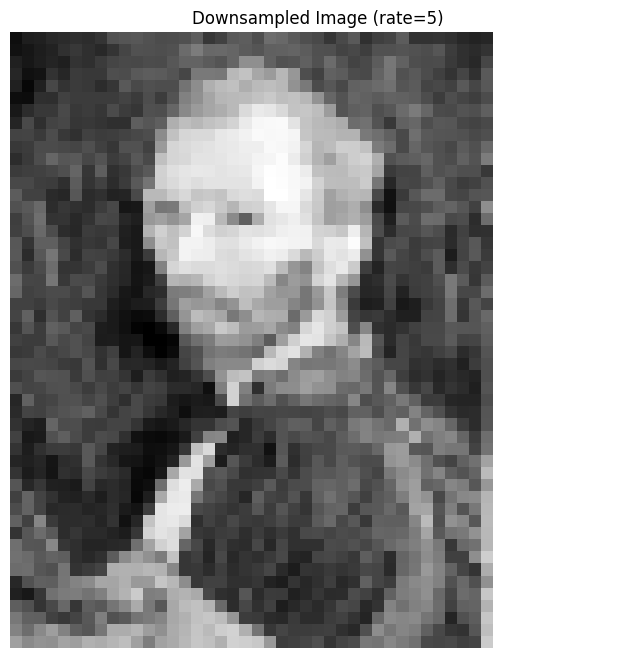

Downsampled image shape: (51, 51)

Original color image shape: (258, 196, 3)


C:\Users\s-rda\AppData\Local\Temp\ipykernel_27296\1722994297.py:67: RuntimeWarning: invalid value encountered in cast
  output_image = output_image.astype(np.uint8)


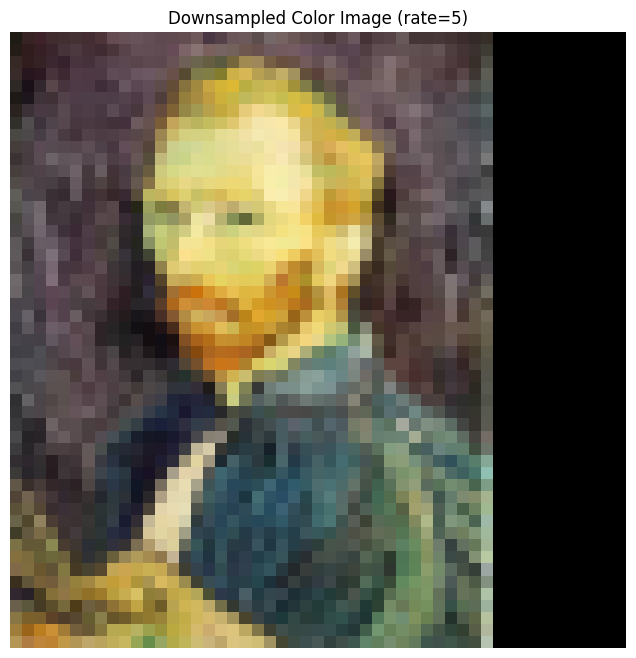

Downsampled color image shape: (51, 51, 3)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def downsample_image(image, k):
    """
    Downsample an image by averaging k x k blocks.
    
    Parameters:
    image : numpy.ndarray
    k : int
        
    Returns:
    numpy.ndarray : Downsampled image
    """
    # Check if image is grayscale (2D) or color (3D)
    if len(image.shape) == 2:
        # Grayscale image
        N = image.shape[0]  # Assuming square image
        
        # Calculate output size
        output_size = N // k
        
        # Create output array
        output_image = np.zeros((output_size, output_size))
        
        # Loop through each block
        for i in range(output_size):
            for j in range(output_size):

                # Extract the block
                block = image[i*k:(i+1)*k, j*k:(j+1)*k]
                
                # Calculate average of the block
                output_image[i, j] = np.mean(block)
        
        # Display the downsampled image
        plt.figure(figsize=(8, 8))
        plt.imshow(output_image, cmap='gray')
        plt.title(f'Downsampled Image (rate={k})')
        plt.axis('off')
        plt.show()
        
    elif len(image.shape) == 3:

        # Color image (RGB)
        N = image.shape[0] 
        channels = image.shape[2] 
        
        # Calculate output size
        output_size = N // k
        
        # Create output array for color image
        output_image = np.zeros((output_size, output_size, channels))
        
        # Loop through each block
        for i in range(output_size):
            for j in range(output_size):
                
                # Extract the block for all channels
                block = image[i*k:(i+1)*k, j*k:(j+1)*k, :]
                
                # Calculate average of the block for each channel
                output_image[i, j, :] = np.mean(block, axis=(0, 1))
        
        # Convert to uint8 for display
        output_image = output_image.astype(np.uint8)
        
        # Display the downsampled image
        plt.figure(figsize=(8, 8))
        plt.imshow(output_image)
        plt.title(f'Downsampled Color Image (rate={k})')
        plt.axis('off')
        plt.show()
    
    return output_image


# Test with grayscale image
img = Image.open('sample_image.jpg').convert('L')
img_array = np.array(img)

print("Original image shape:", img_array.shape)

# Downsample with rate = 5
downsampled = downsample_image(img_array, 5)
print("Downsampled image shape:", downsampled.shape)

# Test with color image
img_color = Image.open('sample_image.jpg')
img_color_array = np.array(img_color)

print("\nOriginal color image shape:", img_color_array.shape)

# Downsample color image
downsampled_color = downsample_image(img_color_array, 5)
print("Downsampled color image shape:", downsampled_color.shape)

# Word Embedding
LLMs represent words as high dimensional vectors (also known as embeddings). You’ll explore how simple embeddings can capture semantic meanings. Example embeddings of a limited vocabulary are provided below.
- Can you propose a metric to measure the similarity between a pair of words? **Hint**: You have seen a measure in previous assignments.
- Choose an appropriate visualization to show which words are most similar to each other.
- What word do you obtain for `king – man + woman` using vector arithmetic? Does this result make sense to you? Why or why not.

In [10]:
embeddings = {
  "king": [
    1.0, 1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "queen": [
    1.0, -1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "man": [
    0.0, 1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "woman": [
    0.0, -1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "apple": [
    0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.7, 0.2, 0.6, 0.2
  ] + [0.0]*40,
  "banana": [
    0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.6, 0.8, 0.6, 0.7
  ] + [0.0]*40
}


Similarity Matrix:
Words: ['king', 'queen', 'man', 'woman', 'apple', 'banana']
[[1.         0.5505618  0.794645   0.22906137 0.         0.        ]
 [0.5505618  1.         0.22906137 0.794645   0.         0.        ]
 [0.794645   0.22906137 1.         0.28825623 0.         0.        ]
 [0.22906137 0.794645   0.28825623 1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.88687467]
 [0.         0.         0.         0.         0.88687467 1.        ]]



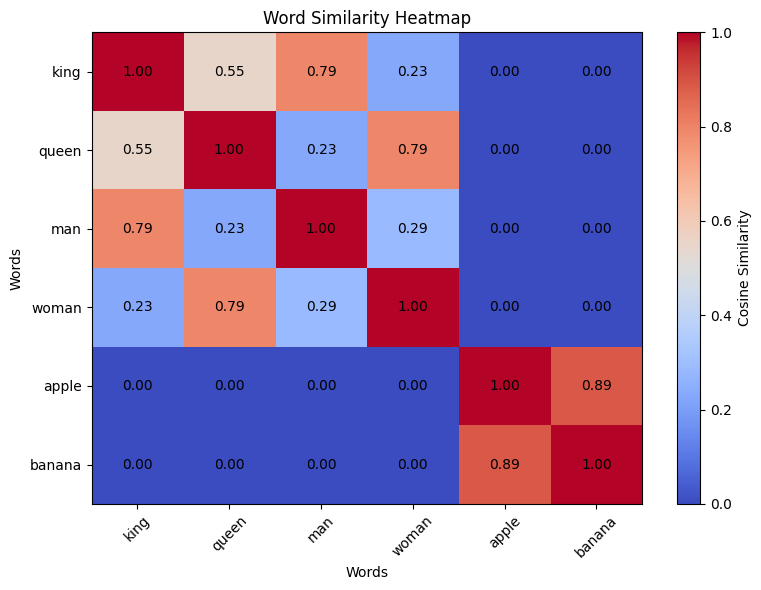

Most similar word pairs (excluding self-similarity):
king - queen: 0.551
king - man: 0.795
king - woman: 0.229
king - apple: 0.000
king - banana: 0.000
queen - man: 0.229
queen - woman: 0.795
queen - apple: 0.000
queen - banana: 0.000
man - woman: 0.288
man - apple: 0.000
man - banana: 0.000
woman - apple: 0.000
woman - banana: 0.000
apple - banana: 0.887

Vector Arithmetic: king - man + woman
Resulting vector: [ 1.  -1.   1.   0.   0.8  0.9  0.   0.   0.   0. ] ...
Similarity to 'king': 0.551
Similarity to 'queen': 1.000
Similarity to 'man': 0.229
Similarity to 'woman': 0.795
Similarity to 'apple': 0.000
Similarity to 'banana': 0.000

Closest word to 'king - man + woman': queen
Similarity: 1.000

Does this make sense?
Yes, this result makes sense because:
- We start with 'king' (male royalty)
- Subtract 'man' (removes the male part)
- Add 'woman' (adds the female part)
- Result should be 'queen' (female royalty)


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Convert embeddings dictionary to numpy arrays
embeddings = {
  "king": np.array([1.0, 1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0] + [0.0]*40),
  "queen": np.array([1.0, -1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0] + [0.0]*40),
  "man": np.array([0.0, 1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0] + [0.0]*40),
  "woman": np.array([0.0, -1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0] + [0.0]*40),
  "apple": np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.7, 0.2, 0.6, 0.2] + [0.0]*40),
  "banana": np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.6, 0.8, 0.6, 0.7] + [0.0]*40)
}

# Part 1: Define similarity metric (Cosine Similarity from preivious assignment)
def cosine_similarity(vec1, vec2):
    """
    Calculate cosine similarity between two vectors.
    Cosine similarity = (vec1 · vec2) / (||vec1|| * ||vec2||)
    """

    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    
    # Avoid division by zero
    if norm1 == 0 or norm2 == 0:
        return 0
    
    return dot_product / (norm1 * norm2)

# Part 2: Calculate similarity matrix
words = list(embeddings.keys())
n_words = len(words)

similarity_matrix = np.zeros((n_words, n_words))

for i in range(n_words):
    for j in range(n_words):
        similarity_matrix[i, j] = cosine_similarity(embeddings[words[i]], embeddings[words[j]])

print("Similarity Matrix:")
print("Words:", words)
print(similarity_matrix)
print()

# Visualize similarity using heatmap
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Cosine Similarity')
plt.xticks(range(n_words), words, rotation=45)
plt.yticks(range(n_words), words)
plt.title('Word Similarity Heatmap')
plt.xlabel('Words')
plt.ylabel('Words')

# Add text annotations
for i in range(n_words):
    for j in range(n_words):
        plt.text(j, i, f'{similarity_matrix[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

# Print most similar pairs
print("Most similar word pairs (excluding self-similarity):")
for i in range(n_words):
    for j in range(i+1, n_words):

        print(f"{words[i]} - {words[j]}: {similarity_matrix[i, j]:.3f}")

print()

# Part 3: Vector arithmetic - king - man + woman
print("Vector Arithmetic: king - man + woman")
result_vector = embeddings["king"] - embeddings["man"] + embeddings["woman"]

print("Resulting vector:", result_vector[:10], "...")

# Find the closest word to the result
max_similarity = -1
closest_word = None

for word in words:
    sim = cosine_similarity(result_vector, embeddings[word])
    print(f"Similarity to '{word}': {sim:.3f}")
    
    if sim > max_similarity:
        max_similarity = sim
        closest_word = word

print(f"\nClosest word to 'king - man + woman': {closest_word}")
print(f"Similarity: {max_similarity:.3f}")

print("\nDoes this make sense?")
print("Yes, this result makes sense because:")
print("- We start with 'king' (male royalty)")
print("- Subtract 'man' (removes the male part)")
print("- Add 'woman' (adds the female part)")
print("- Result should be 'queen' (female royalty)")